<a href="https://colab.research.google.com/github/sangramkesharidash/Google-Colab-files/blob/main/EQUITYDATA_Screener_EDA_PE_PS_RSI_Quartiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
CSV file loaded successfully.
First few rows of CSV:
               Name  BSE Code    NSE Code  \
0        20 Microns  533022.0   20MICRONS   
1  21st Cent. Mgmt.  526921.0  21STCENMGM   
2           360 ONE  542772.0      360ONE   
3       3B Blackbio  532067.0         NaN   
4   3C IT Solutions  544190.0         NaN   

                                Industry  Current Price  High price all time  \
0             Mining / Minerals / Metals         218.62               348.00   
1                  Finance & Investments          77.53               145.05   
2                  Finance & Investments         954.25              1318.00   
3                             Healthcare        1819.50              2350.00   
4  Computers - Software - Medium / Small          23.49                52.26   

   Low price all time  High price  Down from 52w high  Low price  ...  \
0                6.60      348.00               37.18     149.95  ...   
1                2.30  

<ipython-input-1-8caa345d5518>:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-8caa345d5518>:95: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')


Saved plot to /content/drive/My Drive/equitydata-screener-all-stocks/news_output/industry_pe_first_40_21-APR-2025.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


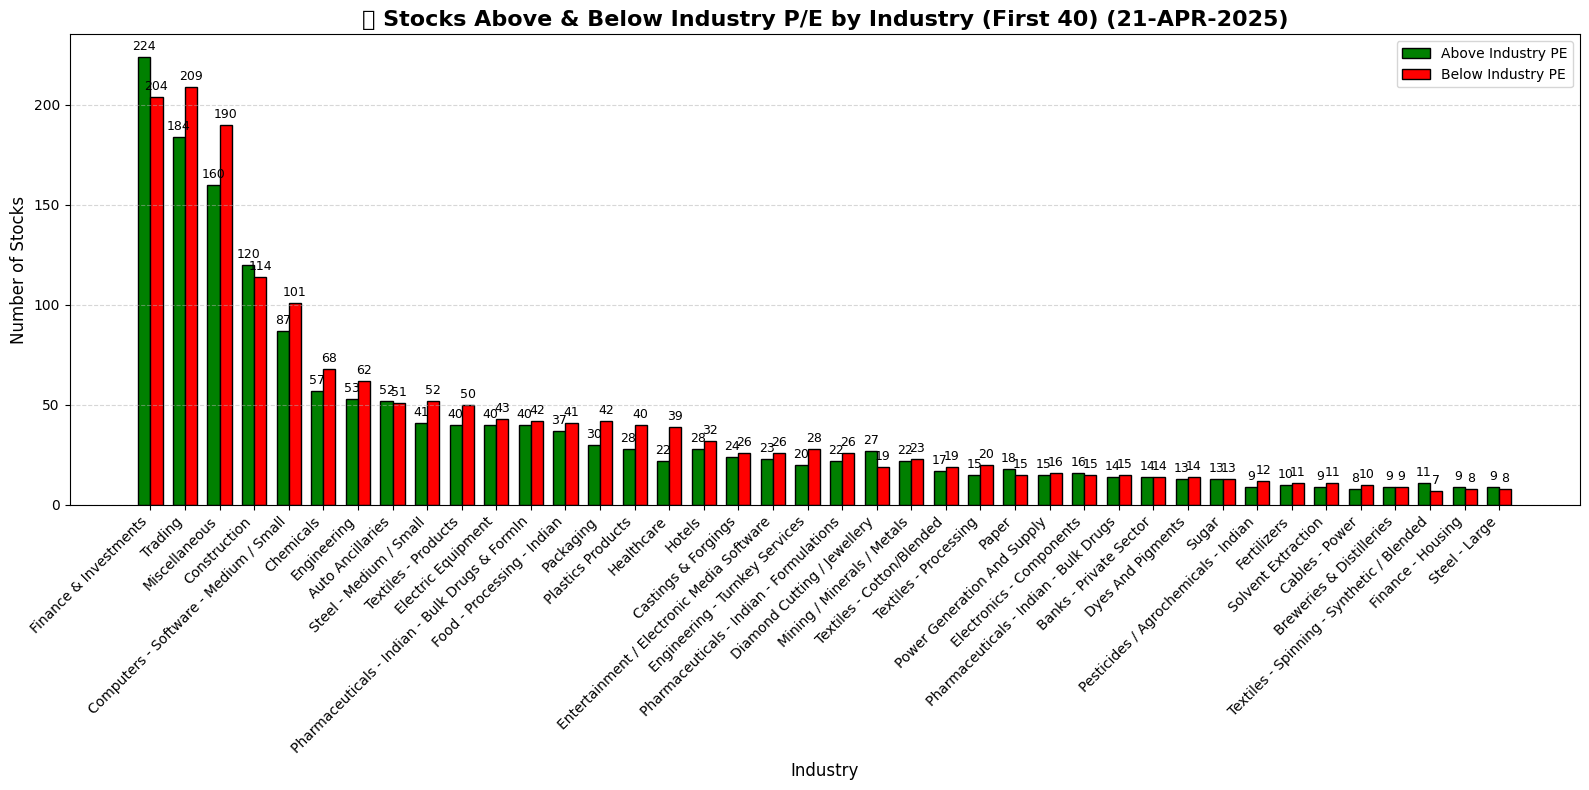

<ipython-input-1-8caa345d5518>:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-8caa345d5518>:95: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')


Saved plot to /content/drive/My Drive/equitydata-screener-all-stocks/news_output/industry_pe_next_40_21-APR-2025.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


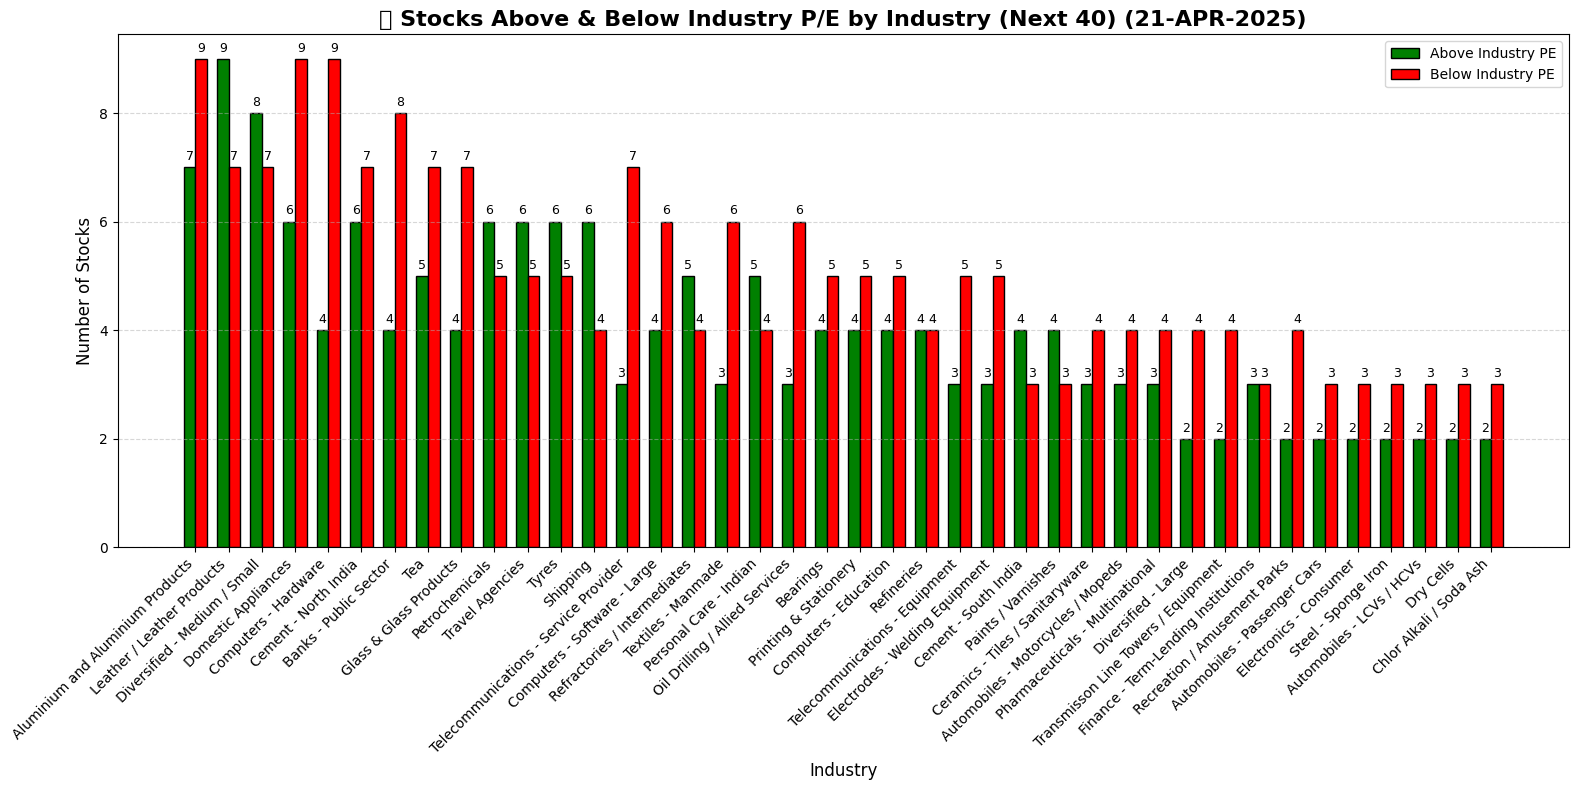

<ipython-input-1-8caa345d5518>:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-8caa345d5518>:95: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')


Saved plot to /content/drive/My Drive/equitydata-screener-all-stocks/news_output/industry_pe_last_40_21-APR-2025.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


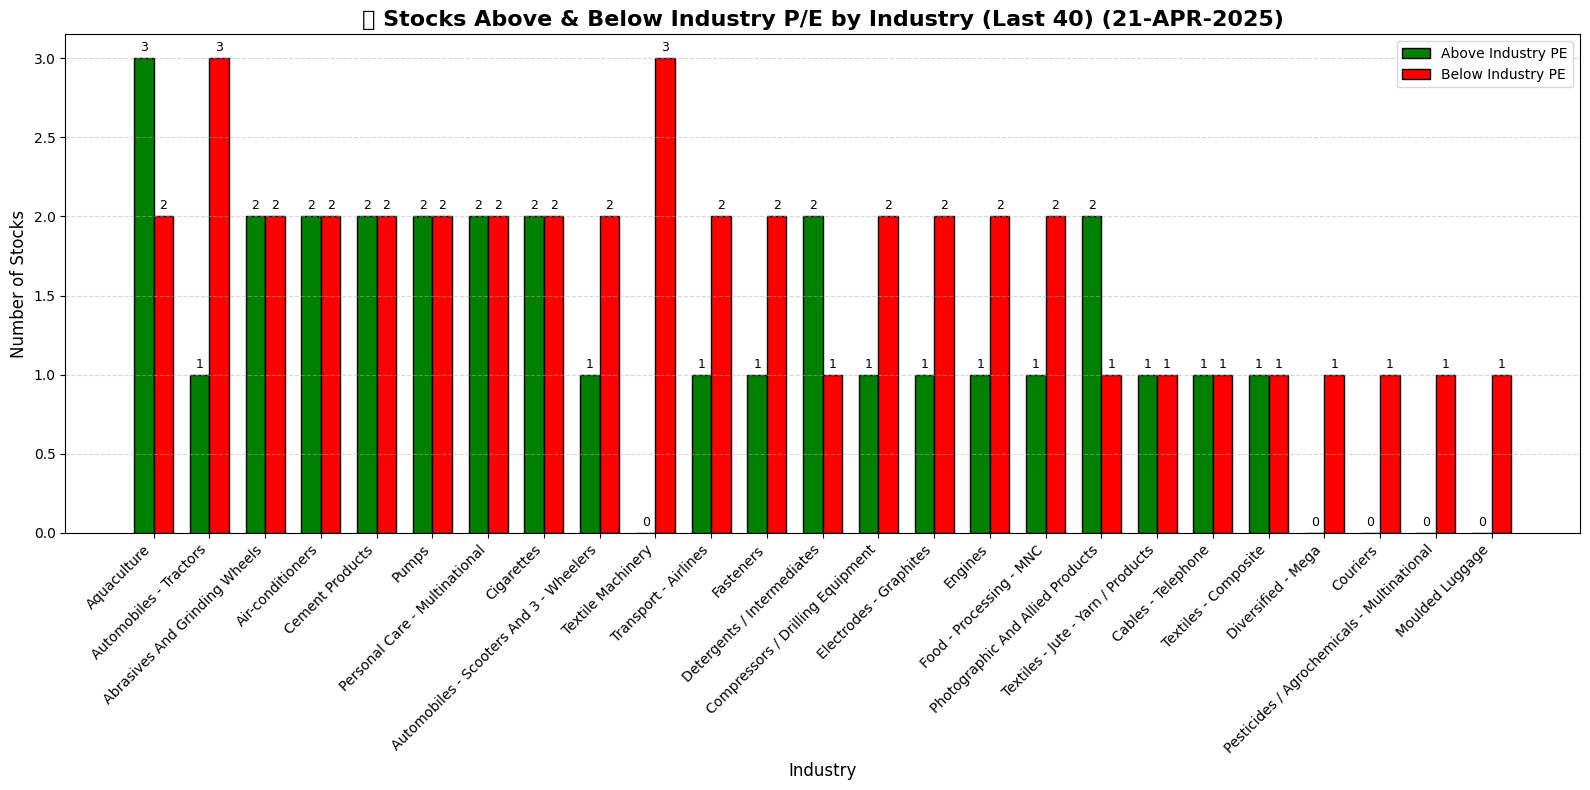

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import os
from google.colab import drive

# Check if Google Drive is mounted; mount if not
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted.")

# Define file path and output folder
file_path = '/content/drive/My Drive/equitydata-screener-all-stocks/equitydata-screener-all-stocks-21-APR-2025.csv'
output_folder = '/content/drive/My Drive/equitydata-screener-all-stocks/news_output'

# Extract the date from the file name using regex (handling DD-MMM-YYYY format)
file_date_match = re.search(r'\d{2}-[A-Z]{3}-\d{4}', file_path)
file_date = file_date_match.group() if file_date_match else 'Unknown Date'

# Load data
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print("CSV file loaded successfully.")
    print("First few rows of CSV:")
    print(df.head())
    print("Columns in CSV:", df.columns.tolist())
except FileNotFoundError:
    print(f"Error: {file_path} not found.")
    exit()
except Exception as e:
    print(f"Error reading CSV file: {e}")
    exit()

# Validate required columns
required_columns = ['Price to Earning', 'Industry PE', 'Industry']
if not all(col in df.columns for col in required_columns):
    print(f"Error: CSV must contain columns: {required_columns}")
    exit()

# Clean and prepare data
industry_pe_df = df.dropna(subset=['Price to Earning', 'Industry PE', 'Industry']).copy()
industry_pe_df['Relative Position'] = industry_pe_df.apply(
    lambda row: 'Above Industry PE' if row['Price to Earning'] > row['Industry PE'] else 'Below Industry PE',
    axis=1
)

# Group and reshape
industry_pe_counts = industry_pe_df.groupby(['Industry', 'Relative Position']).size().unstack(fill_value=0)
industry_pe_counts['Total'] = industry_pe_counts.sum(axis=1)
industry_pe_counts = industry_pe_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Split industries into First 40, Next 40, and Last 40
first_40_industries = industry_pe_counts.head(40)
remaining_industries = industry_pe_counts.iloc[40:]
next_40_industries = remaining_industries.iloc[:40]
last_40_industries = remaining_industries.iloc[40:]

# Ensure output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def plot_industries(industry_group, title, output_filename):
    # Plotting side-by-side bars for a given industry group
    x = np.arange(len(industry_group))
    width = 0.35

    fig, ax = plt.subplots(figsize=(16, 8))
    bars1 = ax.bar(x - width/2, industry_group['Above Industry PE'], width, label='Above Industry PE', color='green', edgecolor='black')
    bars2 = ax.bar(x + width/2, industry_group['Below Industry PE'], width, label='Below Industry PE', color='red', edgecolor='black')

    # Add annotations
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

    # Customize plot
    ax.set_title(f'{title} ({file_date})', fontsize=16, fontweight='bold')
    ax.set_xlabel('Industry', fontsize=12)
    ax.set_ylabel('Number of Stocks', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(industry_group.index, rotation=45, ha='right', fontsize=10)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Save the plot
    output_path = os.path.join(output_folder, output_filename)
    try:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Saved plot to {output_path}")
    except Exception as e:
        print(f"Error saving plot {output_filename}: {e}")

    # Display the plot in Colab
    plt.show()

    # Close the plot to free memory
    plt.close()

# Plot and save for First 40 industries
plot_industries(first_40_industries,
               '📊 Stocks Above & Below Industry P/E by Industry (First 40)',
               f'industry_pe_first_40_{file_date}.png')

# Plot and save for Next 40 industries
plot_industries(next_40_industries,
               '📊 Stocks Above & Below Industry P/E by Industry (Next 40)',
               f'industry_pe_next_40_{file_date}.png')

# Plot and save for Last 40 industries
plot_industries(last_40_industries,
               '📊 Stocks Above & Below Industry P/E by Industry (Last 40)',
               f'industry_pe_last_40_{file_date}.png')

Google Drive already mounted.
Created output directory: /content/drive/My Drive/equitydata-screener-pe-ps-rsi-quartiles
CSV file loaded successfully.
First few rows of CSV:
               Name  BSE Code    NSE Code  \
0        20 Microns  533022.0   20MICRONS   
1  21st Cent. Mgmt.  526921.0  21STCENMGM   
2           360 ONE  542772.0      360ONE   
3       3B Blackbio  532067.0         NaN   
4   3C IT Solutions  544190.0         NaN   

                                Industry  Current Price  High price all time  \
0             Mining / Minerals / Metals         218.62               348.00   
1                  Finance & Investments          77.53               145.05   
2                  Finance & Investments         954.25              1318.00   
3                             Healthcare        1819.50              2350.00   
4  Computers - Software - Medium / Small          23.49                52.26   

   Low price all time  High price  Down from 52w high  Low price  ...  \
0 

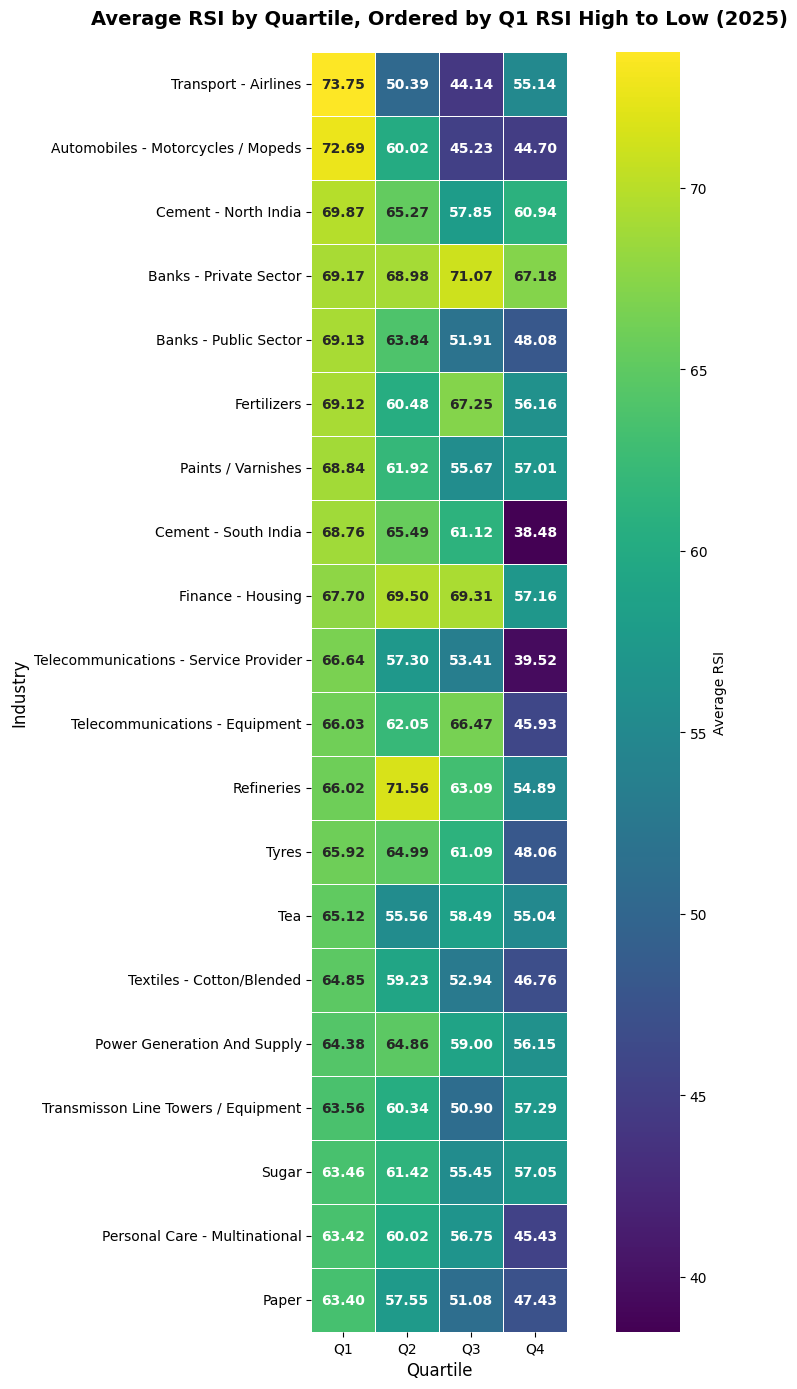

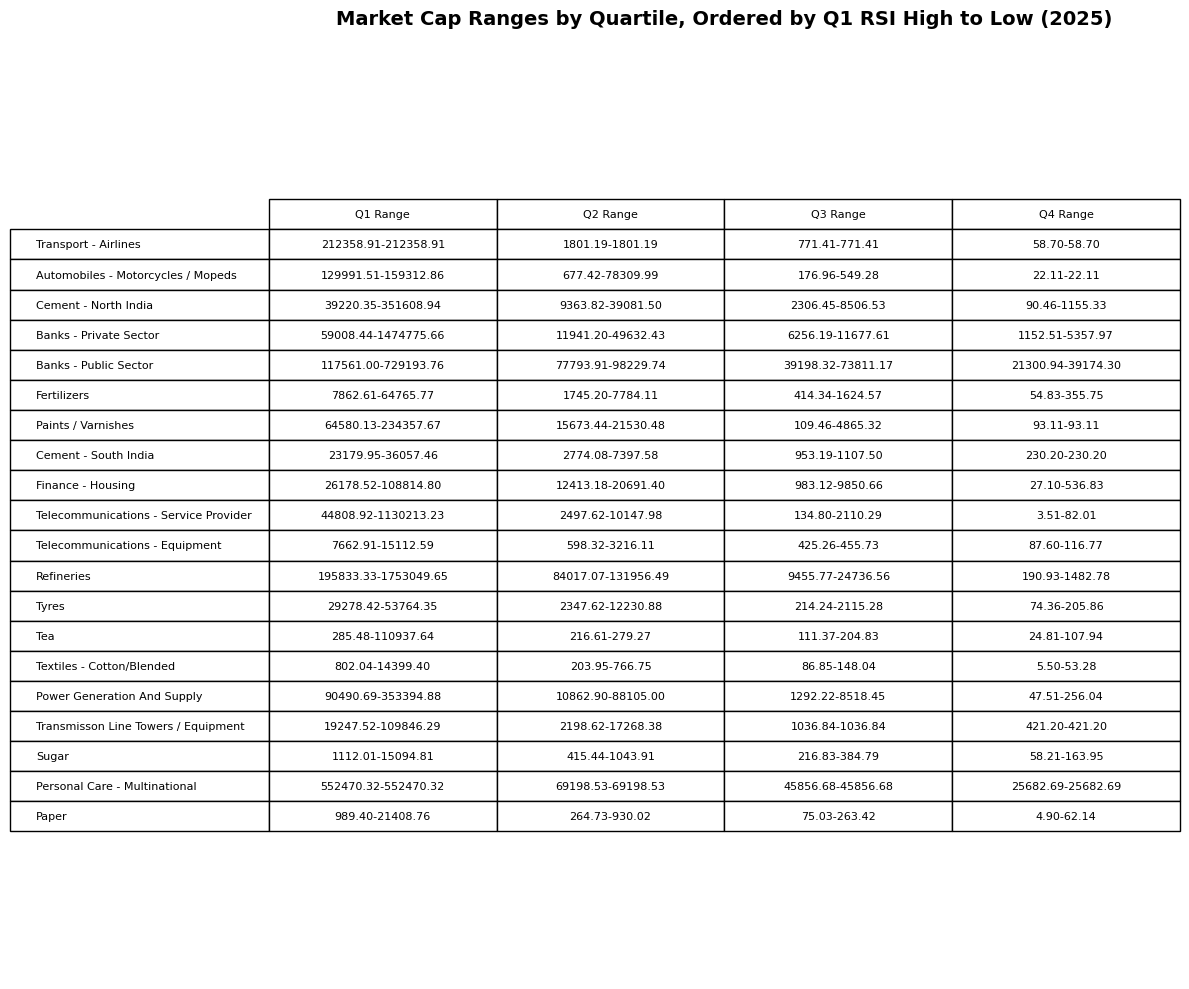

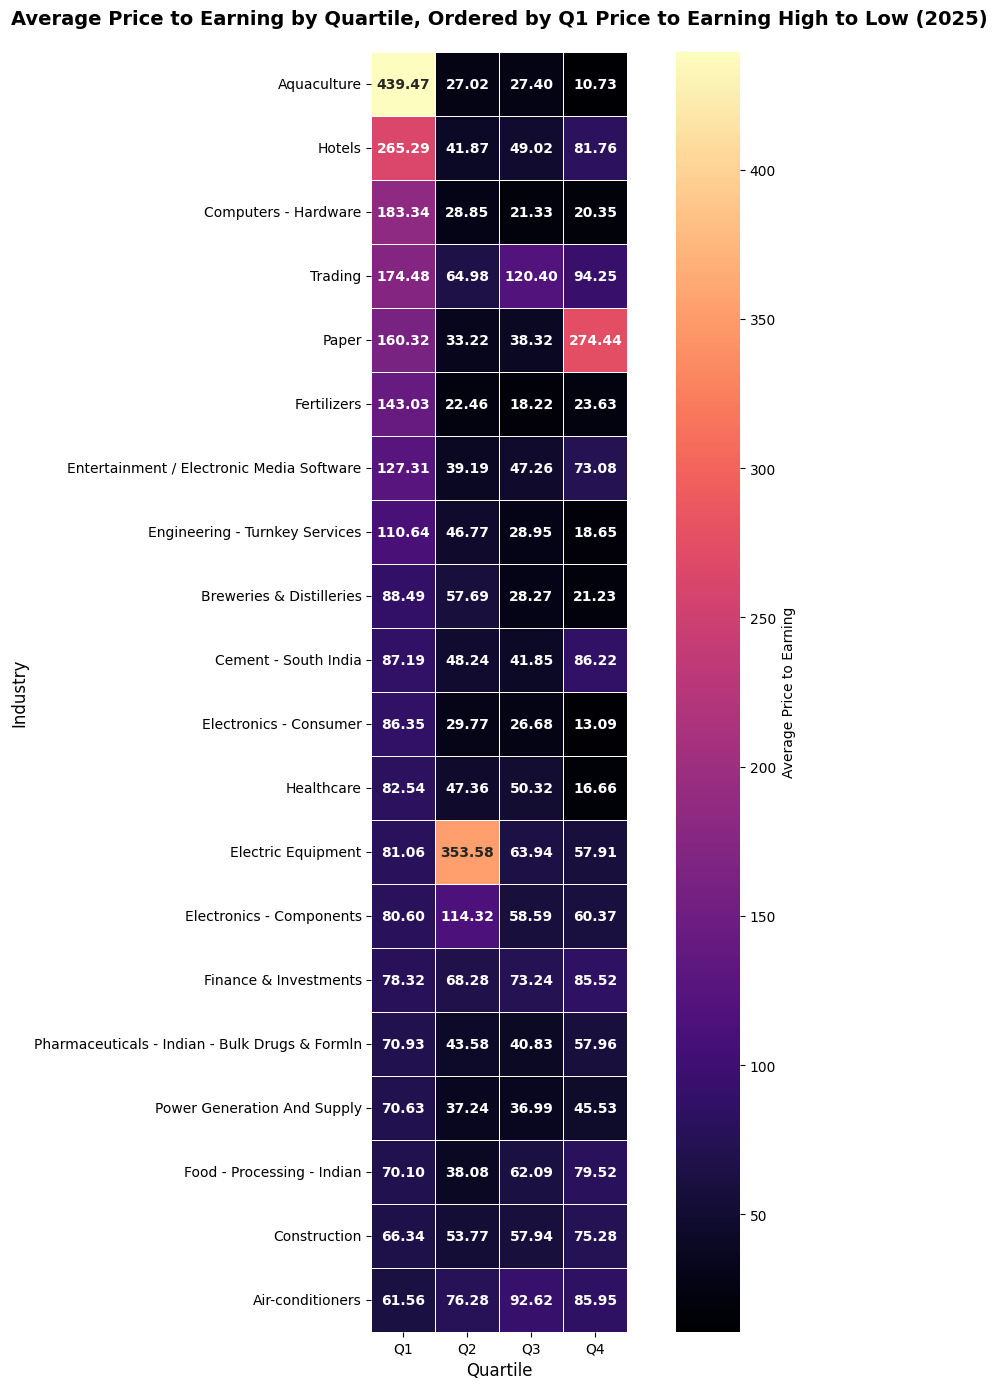

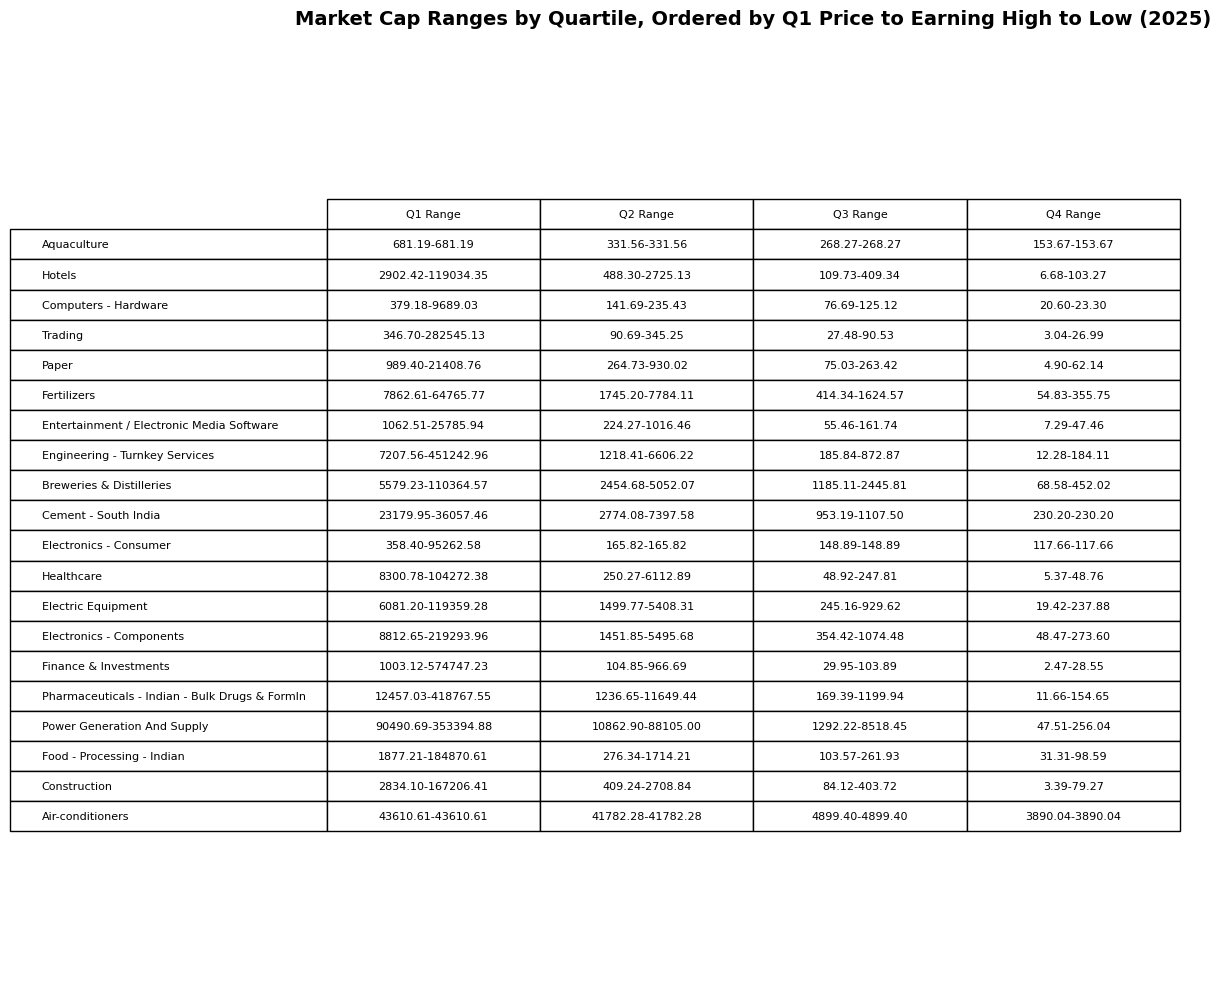

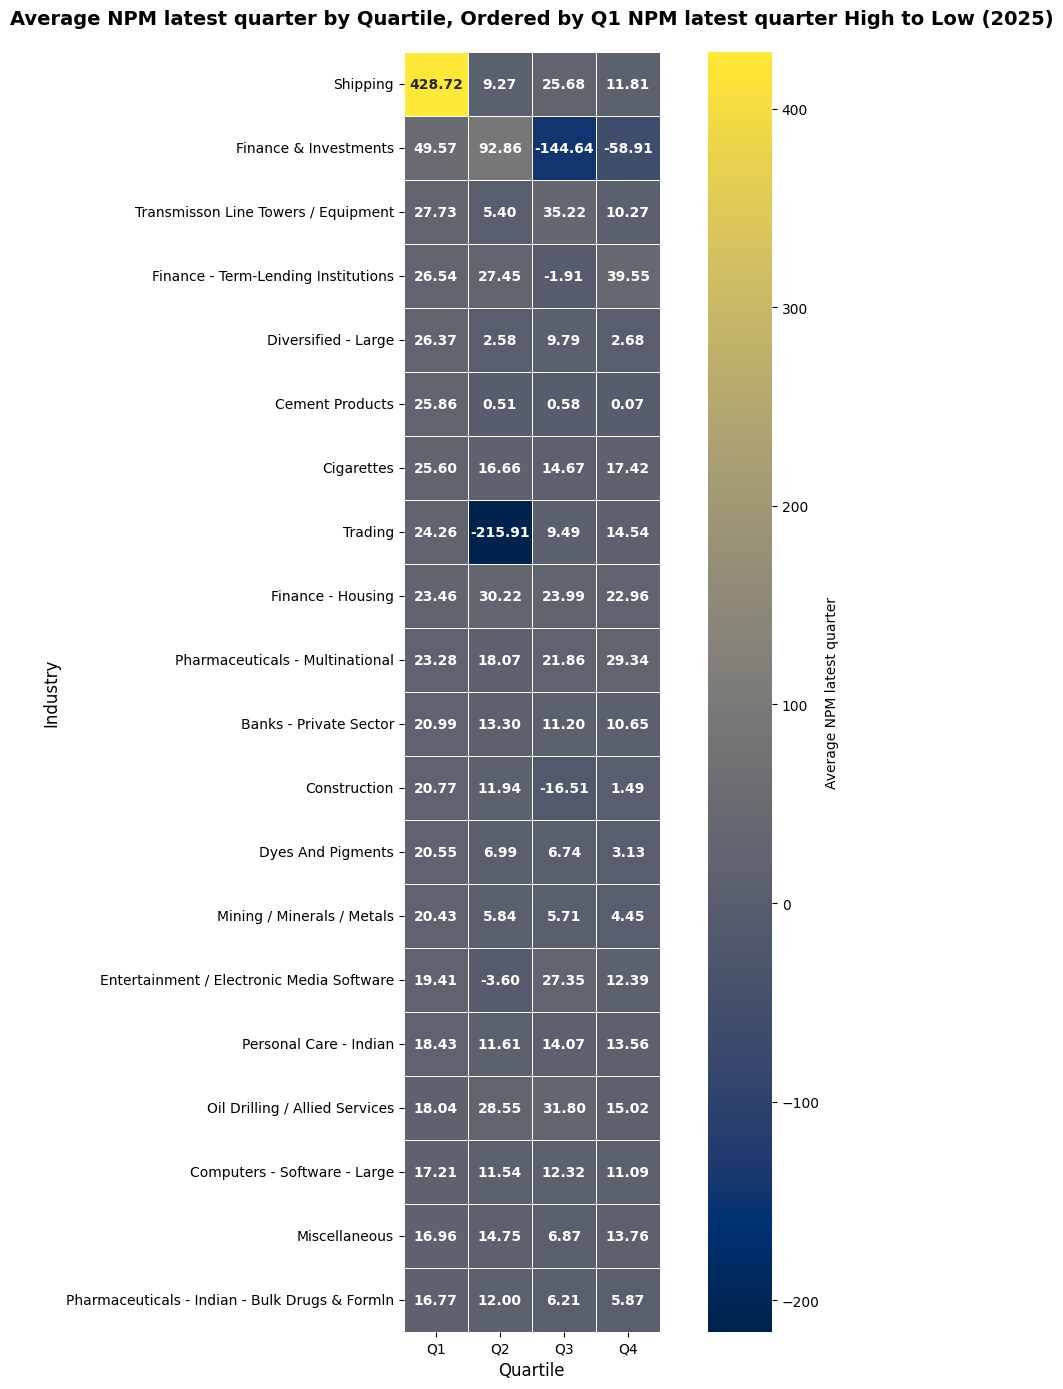

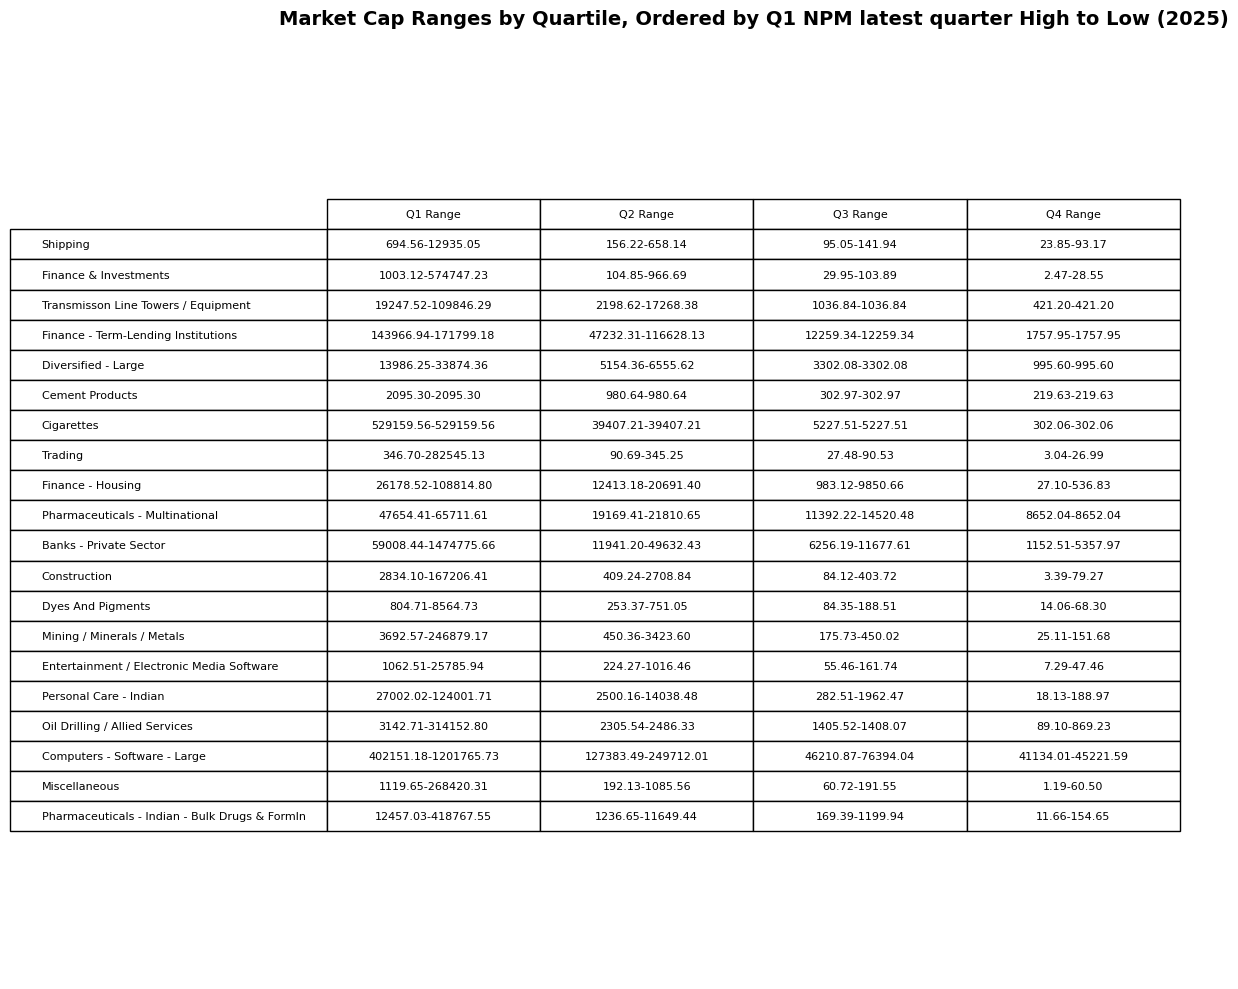

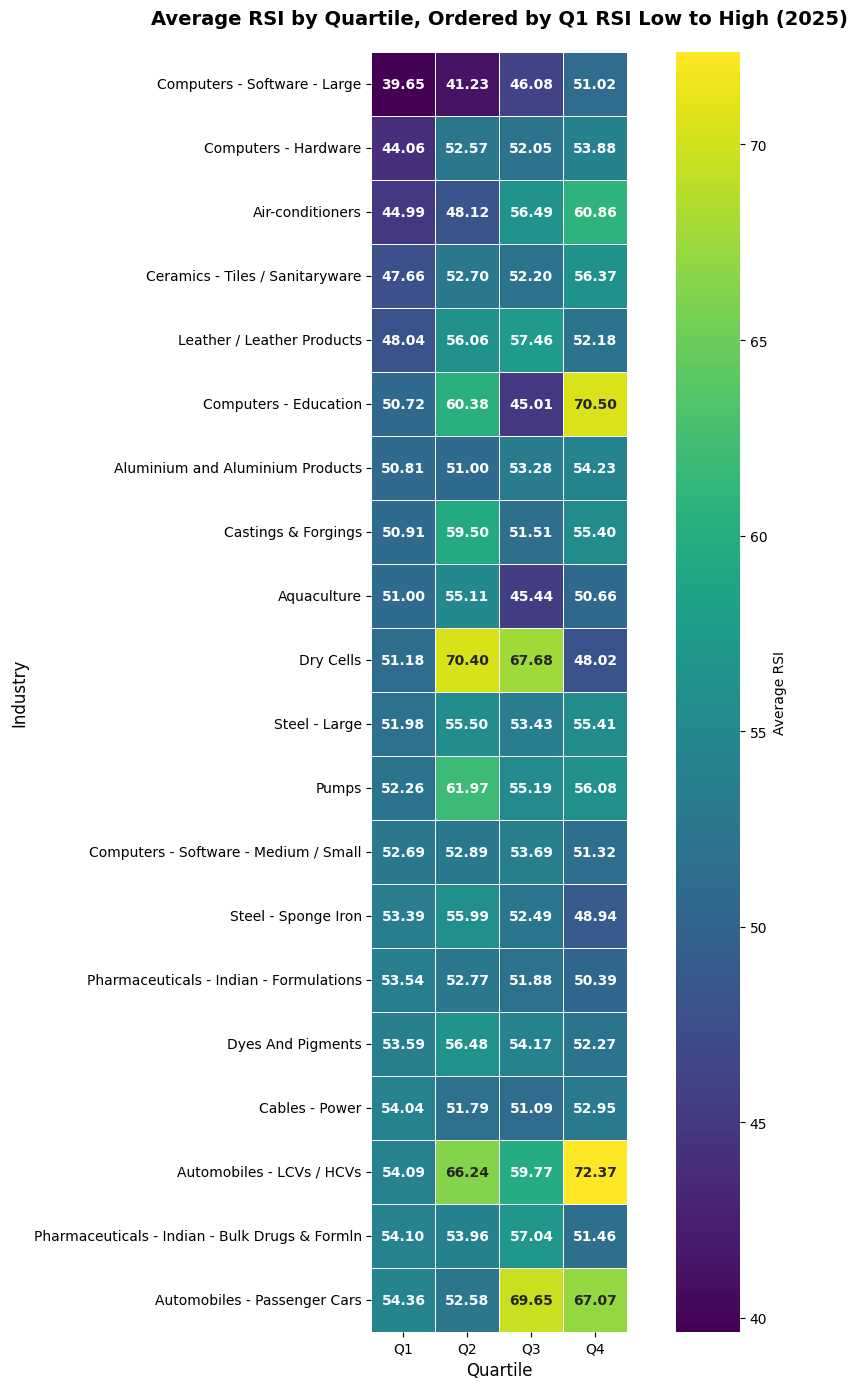

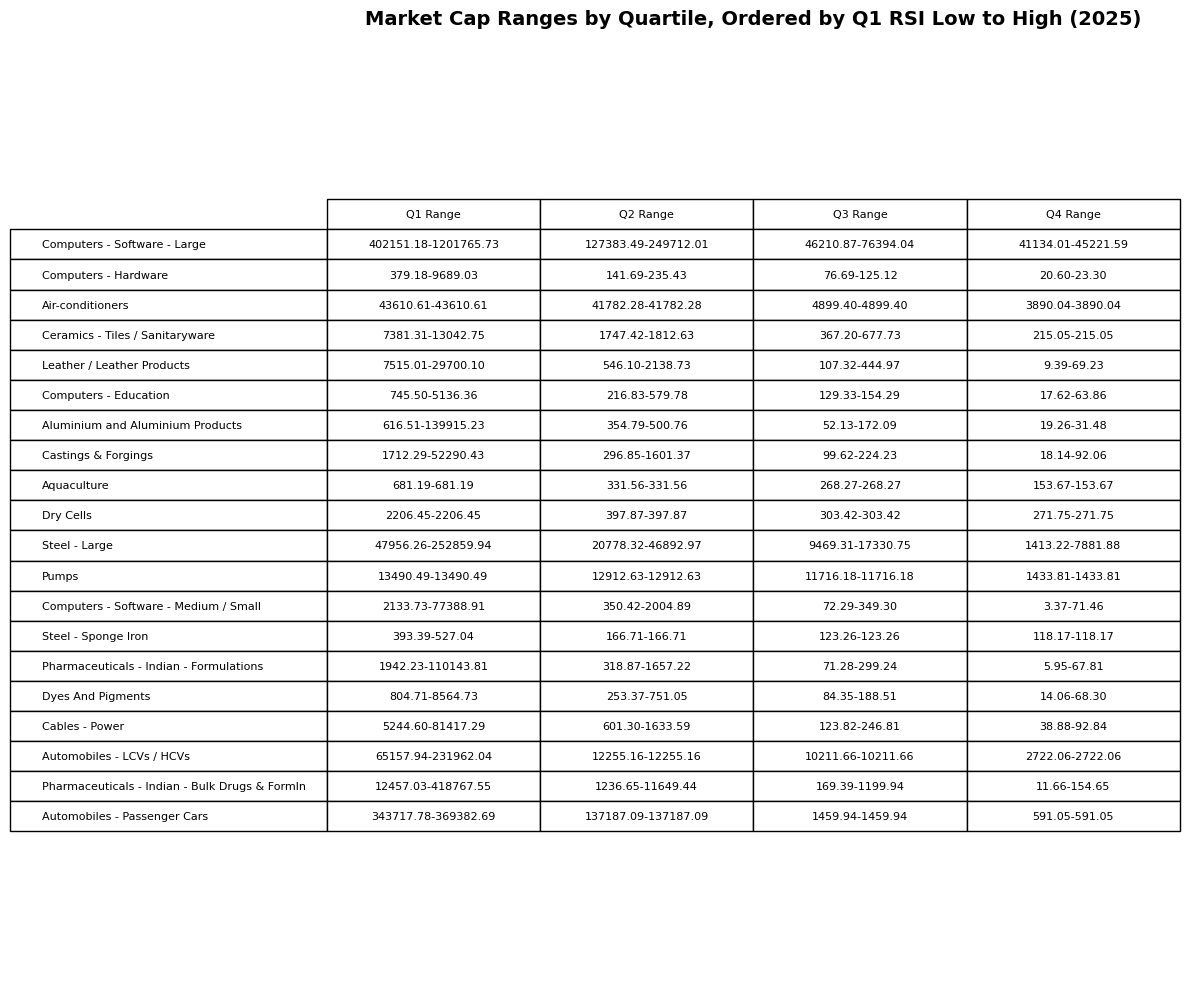

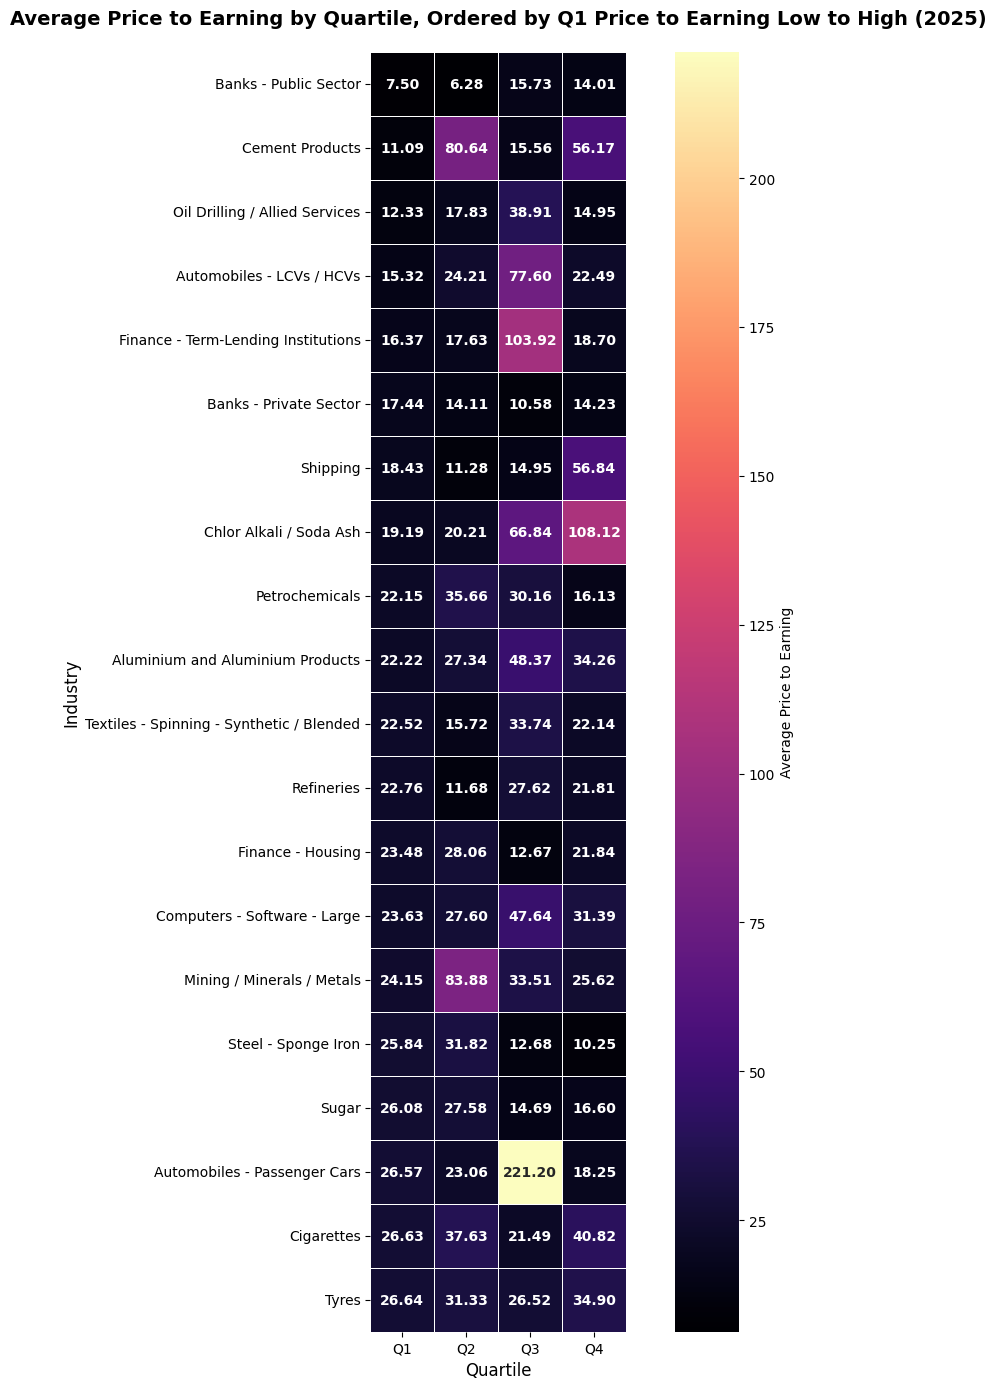

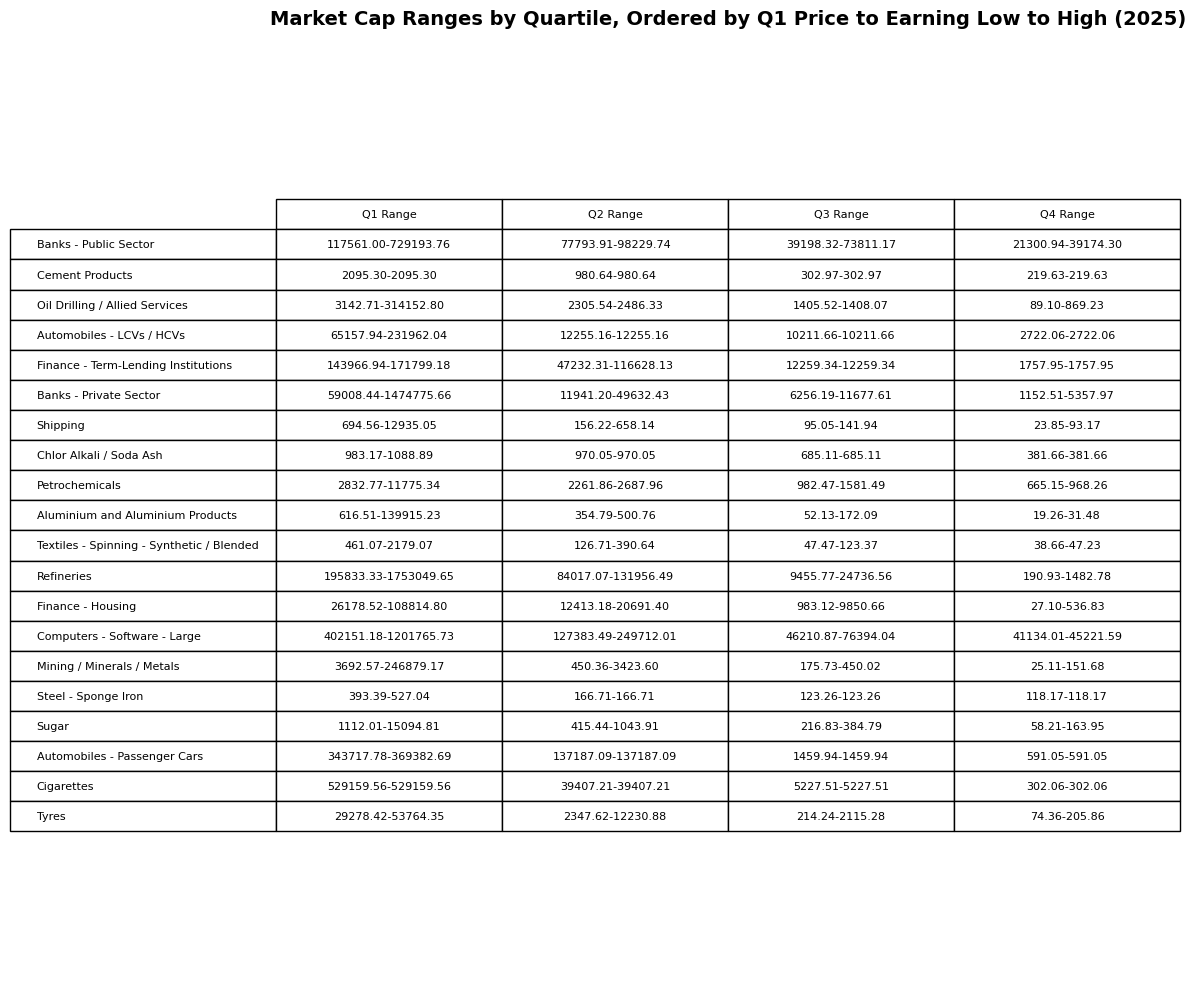

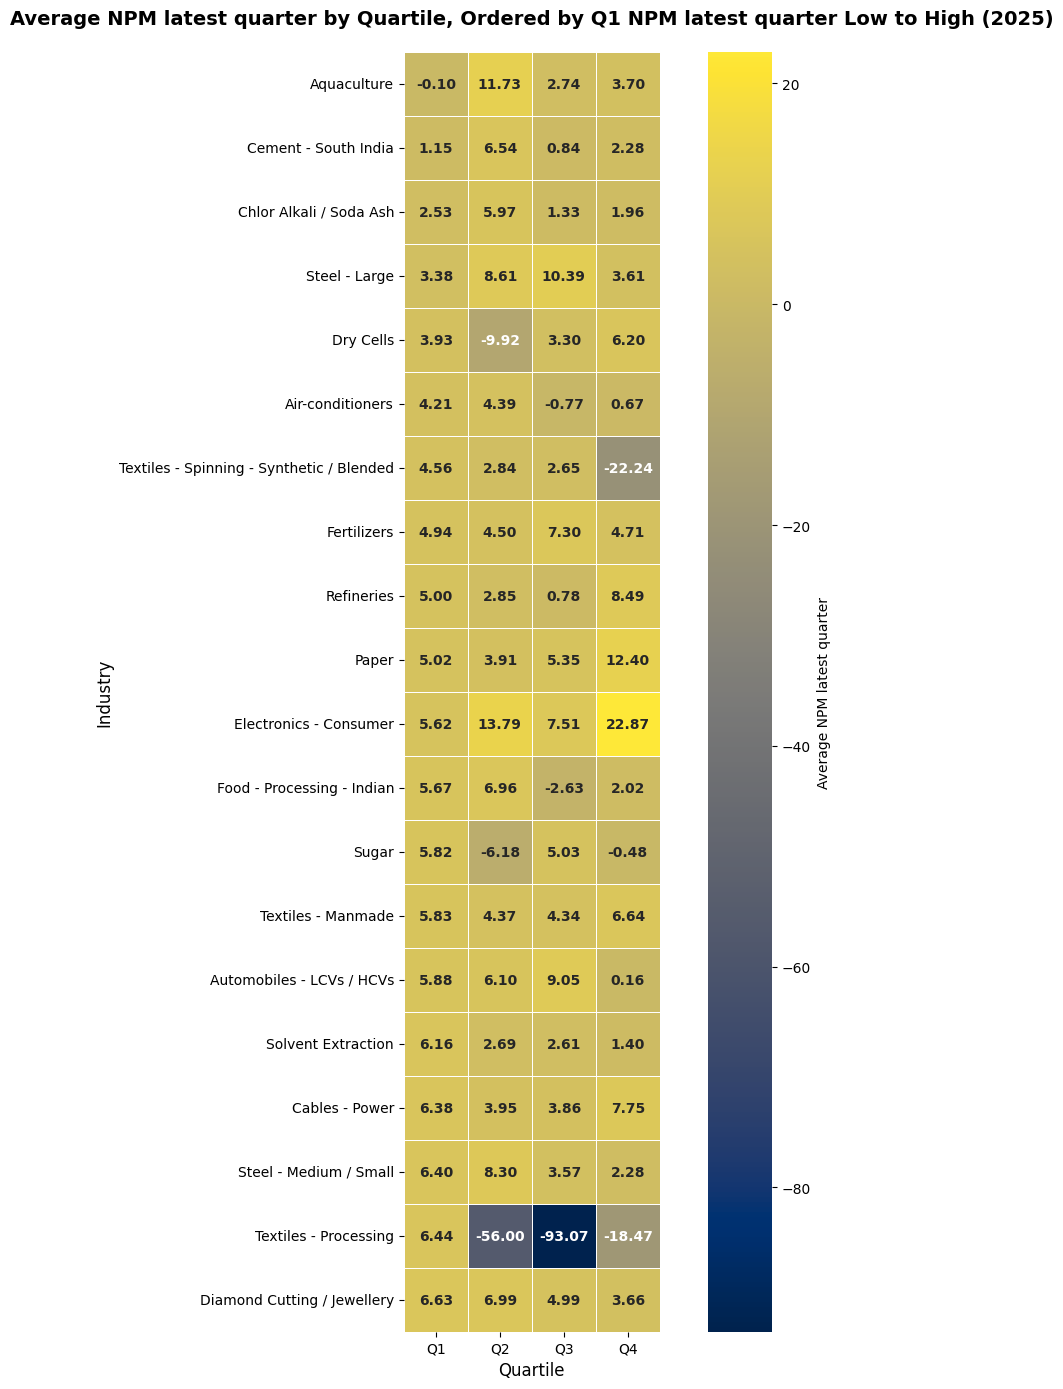

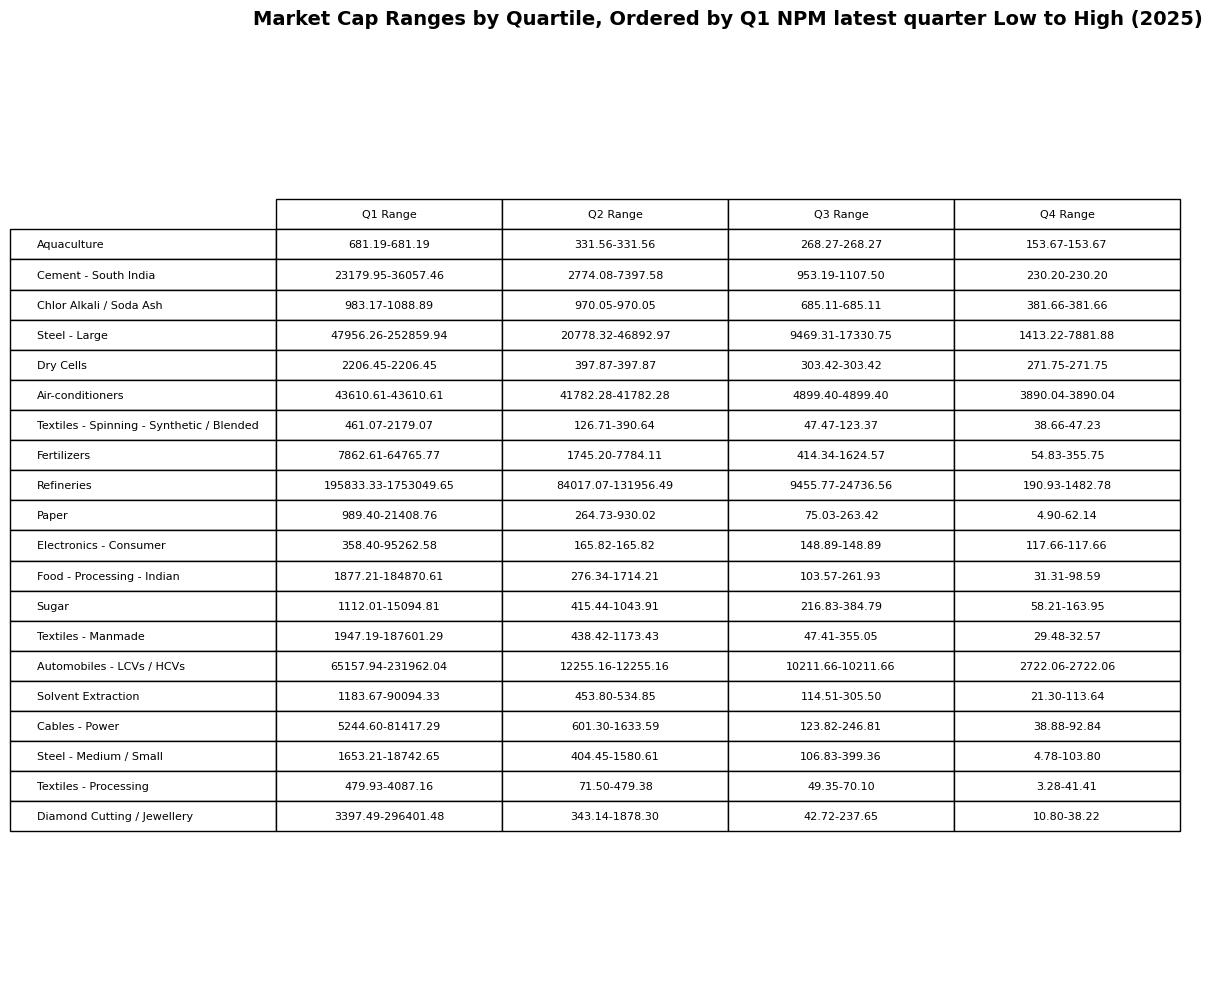

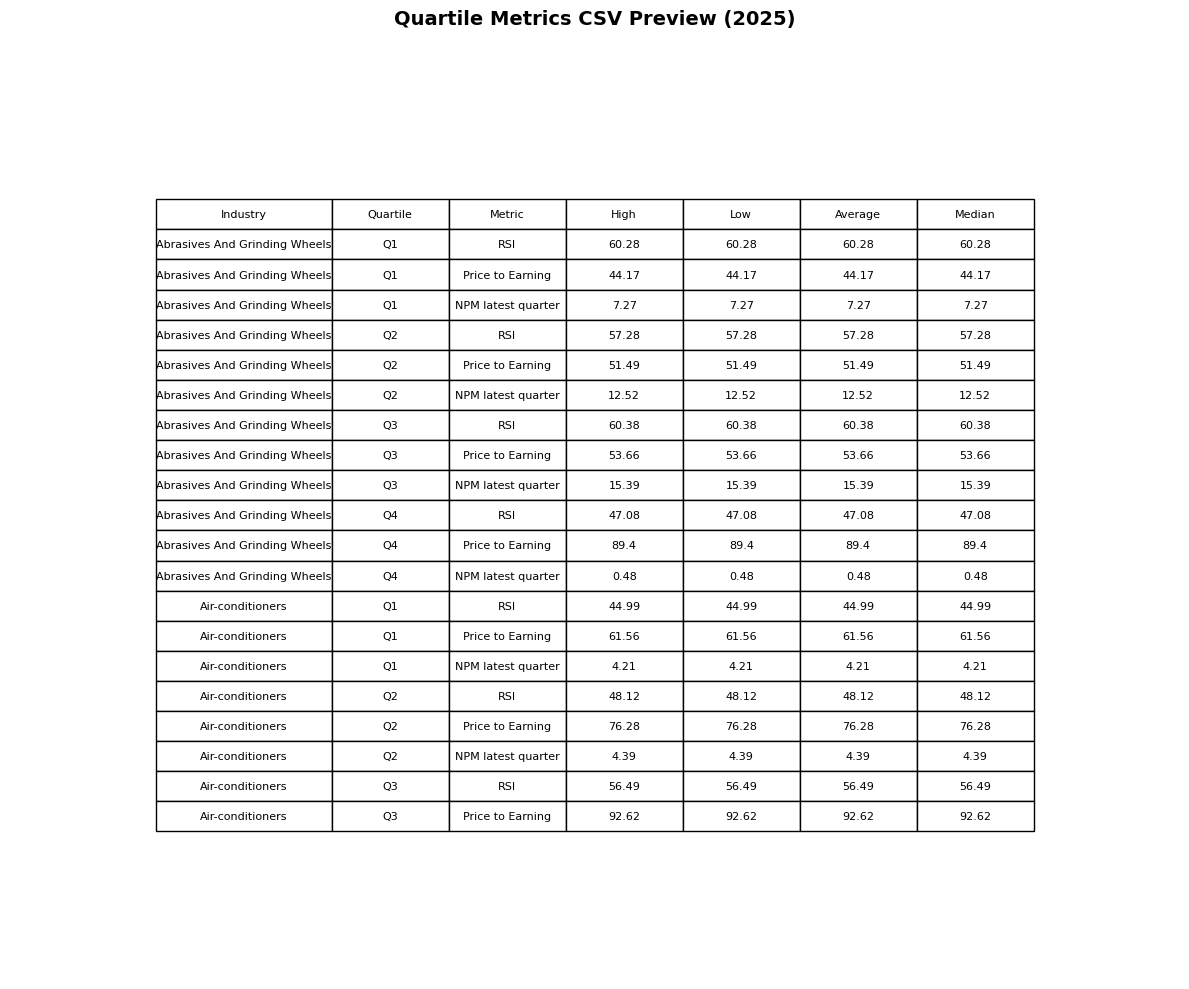

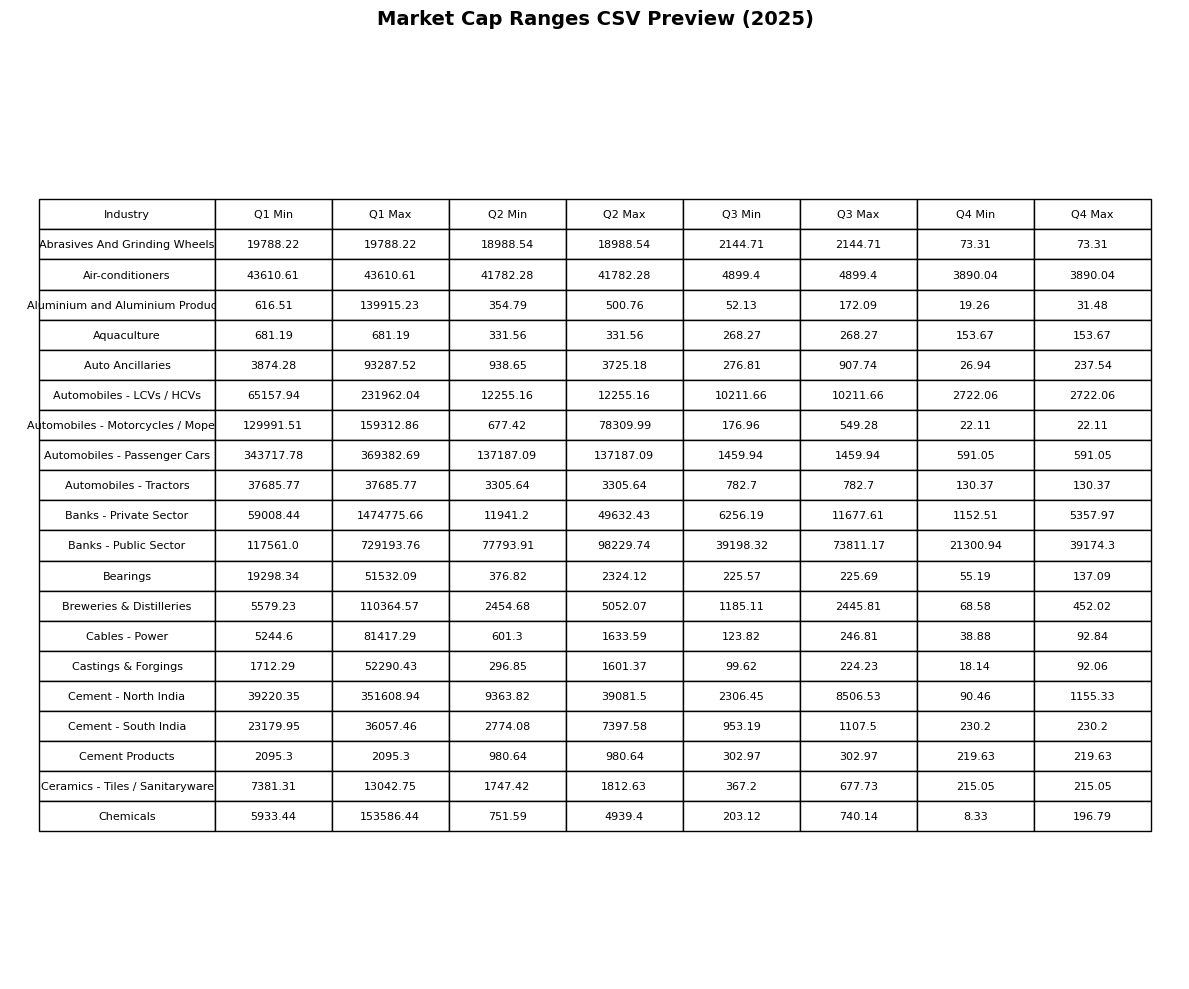

Metrics results saved to /content/drive/My Drive/equitydata-screener-pe-ps-rsi-quartiles/2025_quartile_metrics_by_industry.csv
Market Cap ranges saved to /content/drive/My Drive/equitydata-screener-pe-ps-rsi-quartiles/2025_mcap_ranges.csv
Heatmaps saved to /content/drive/My Drive/equitydata-screener-pe-ps-rsi-quartiles with filenames: 2025_heatmap_RSI_high_to_low.png, 2025_heatmap_Price to Earning_high_to_low.png, 2025_heatmap_NPM latest quarter_high_to_low.png, 2025_heatmap_RSI_low_to_high.png, 2025_heatmap_Price to Earning_low_to_high.png, 2025_heatmap_NPM latest quarter_low_to_high.png
Market Cap tables saved to /content/drive/My Drive/equitydata-screener-pe-ps-rsi-quartiles with filenames: 2025_mcap_ranges_table_RSI_high_to_low.png, 2025_mcap_ranges_table_Price to Earning_high_to_low.png, 2025_mcap_ranges_table_NPM latest quarter_high_to_low.png, 2025_mcap_ranges_table_RSI_low_to_high.png, 2025_mcap_ranges_table_Price to Earning_low_to_high.png, 2025_mcap_ranges_table_NPM latest qu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
from google.colab import drive
from matplotlib.table import table

# Check if Google Drive is mounted; mount if not
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted.")

# Define input file path and output directory
file_path = '/content/drive/My Drive/equitydata-screener-all-stocks/equitydata-screener-all-stocks-21-APR-2025.csv'
output_dir = '/content/drive/My Drive/equitydata-screener-pe-ps-rsi-quartiles'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory: {output_dir}")

# Extract the string between the last '-' and '.csv' (e.g., '21-APR-2025')
filename = os.path.basename(file_path)
prefix_match = re.search(r'-([^-]+)\.csv$', filename)
if prefix_match:
    file_prefix = prefix_match.group(1)  # e.g., '21-APR-2025'
else:
    raise ValueError("Could not extract string between last '-' and '.csv'")

# Load data
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print("CSV file loaded successfully.")
    print("First few rows of CSV:")
    print(df.head())
    print("Columns in CSV:", df.columns.tolist())
except FileNotFoundError:
    print(f"Error: File not found at: {file_path}")
    exit()
except Exception as e:
    print(f"Error reading CSV file: {e}")
    exit()

# Define required columns
required_columns = ['Industry', 'Market Capitalization', 'Price to Earning', 'RSI', 'NPM latest quarter']
if not all(col in df.columns for col in required_columns):
    print(f"Error: CSV file must contain columns: {required_columns}")
    exit()

# Clean and prepare data
df_clean = df[required_columns].copy()

# Convert columns to numeric, handling non-numeric values
for col in ['Market Capitalization', 'Price to Earning', 'RSI', 'NPM latest quarter']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Drop rows with missing or non-numeric values
df_clean = df_clean.dropna()
if df_clean.empty:
    print("Error: No valid data after cleaning. Check for non-numeric or missing values.")
    exit()

# Function to compute quartile metrics and Market Cap ranges
def compute_quartile_metrics_and_mcap_ranges(df):
    metric_results = []
    mcap_ranges = []

    for industry, group in df.groupby('Industry'):
        group_sorted = group.sort_values('Market Capitalization', ascending=False)
        n = len(group_sorted)
        if n < 4:
            continue

        quartile_size = n // 4
        remainder = n % 4
        quartile_indices = []
        start = 0
        for i in range(4):
            size = quartile_size + (1 if i < remainder else 0)
            quartile_indices.append((start, start + size))
            start += size

        mcap_range = {'Industry': industry}
        for q, (start, end) in enumerate(quartile_indices, 1):
            if start < end:
                quartile_data = group_sorted.iloc[start:end]

                metrics = {
                    'RSI': {
                        'High': quartile_data['RSI'].max(),
                        'Low': quartile_data['RSI'].min(),
                        'Average': quartile_data['RSI'].mean(),
                        'Median': quartile_data['RSI'].median()
                    },
                    'Price to Earning': {
                        'High': quartile_data['Price to Earning'].max(),
                        'Low': quartile_data['Price to Earning'].min(),
                        'Average': quartile_data['Price to Earning'].mean(),
                        'Median': quartile_data['Price to Earning'].median()
                    },
                    'NPM latest quarter': {
                        'High': quartile_data['NPM latest quarter'].max(),
                        'Low': quartile_data['NPM latest quarter'].min(),
                        'Average': quartile_data['NPM latest quarter'].mean(),
                        'Median': quartile_data['NPM latest quarter'].median()
                    }
                }

                for metric, values in metrics.items():
                    metric_results.append({
                        'Industry': industry,
                        'Quartile': f'Q{q}',
                        'Metric': metric,
                        'High': values['High'],
                        'Low': values['Low'],
                        'Average': values['Average'],
                        'Median': values['Median']
                    })

                mcap_min = quartile_data['Market Capitalization'].min()
                mcap_max = quartile_data['Market Capitalization'].max()
                mcap_range[f'Q{q} Min'] = mcap_min
                mcap_range[f'Q{q} Max'] = mcap_max

        mcap_ranges.append(mcap_range)

    return pd.DataFrame(metric_results), pd.DataFrame(mcap_ranges)

# Compute quartile metrics and Market Cap ranges
quartile_metrics_df, mcap_ranges_df = compute_quartile_metrics_and_mcap_ranges(df_clean)

# Save quartile metrics to CSV
output_csv_metrics = os.path.join(output_dir, f'{file_prefix}_quartile_metrics_by_industry.csv')
quartile_metrics_df.to_csv(output_csv_metrics, index=False)

# Save Market Cap ranges to CSV
output_csv_mcap = os.path.join(output_dir, f'{file_prefix}_mcap_ranges.csv')
mcap_ranges_df.to_csv(output_csv_mcap, index=False)

# Prepare data for heatmaps
metrics = ['RSI', 'Price to Earning', 'NPM latest quarter']
heatmap_data = {}
for metric in metrics:
    pivot = quartile_metrics_df[quartile_metrics_df['Metric'] == metric].pivot_table(
        values='Average',
        index='Industry',
        columns='Quartile',
        aggfunc='mean'
    )
    pivot = pivot.reindex(columns=['Q1', 'Q2', 'Q3', 'Q4'], fill_value=np.nan)
    heatmap_data[metric] = pivot

# Function to create calendar-style heatmap
def plot_heatmap(data, metric, sorted_industries, title, cmap, filename):
    top_industries = sorted_industries[:20]
    plot_data = data.loc[top_industries]

    plt.figure(figsize=(10, 14))
    sns.heatmap(
        plot_data,
        annot=True,
        fmt='.2f',
        cmap=cmap,
        cbar_kws={'label': f'Average {metric}'},
        square=True,
        linewidths=0.5,
        annot_kws={'size': 10, 'weight': 'bold'},
    )
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Quartile', fontsize=12)
    plt.ylabel('Industry', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10, rotation=0)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), bbox_inches='tight')
    plt.show()
    plt.close()

# Function to create Market Cap range table visualization
def plot_mcap_table(mcap_ranges, sorted_industries, title, filename):
    top_industries = sorted_industries[:20]
    mcap_plot_data = mcap_ranges[mcap_ranges['Industry'].isin(top_industries)][
        ['Industry', 'Q1 Min', 'Q1 Max', 'Q2 Min', 'Q2 Max', 'Q3 Min', 'Q3 Max', 'Q4 Min', 'Q4 Max']
    ].set_index('Industry').loc[top_industries]

    fig, ax = plt.subplots(figsize=(12, 10))
    ax.axis('off')
    table_data = [[f"{row['Q1 Min']:.2f}-{row['Q1 Max']:.2f}",
                   f"{row['Q2 Min']:.2f}-{row['Q2 Max']:.2f}",
                   f"{row['Q3 Min']:.2f}-{row['Q3 Max']:.2f}",
                   f"{row['Q4 Min']:.2f}-{row['Q4 Max']:.2f}"]
                  for _, row in mcap_plot_data.iterrows()]
    tbl = table(
        ax,
        cellText=table_data,
        colLabels=['Q1 Range', 'Q2 Range', 'Q3 Range', 'Q4 Range'],
        rowLabels=mcap_plot_data.index,
        loc='center',
        cellLoc='center',
        colWidths=[0.25]*4
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(8)
    tbl.scale(1, 1.5)
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), bbox_inches='tight')
    plt.show()
    plt.close()

# Function to create CSV screenshot
def plot_csv_screenshot(df, title, filename, max_rows=20):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.axis('off')
    display_df = df.head(max_rows)
    table_data = display_df.values.tolist()
    tbl = table(
        ax,
        cellText=table_data,
        colLabels=display_df.columns,
        loc='center',
        cellLoc='center',
        colWidths=[0.15 if col == 'Industry' else 0.1 for col in display_df.columns]
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(8)
    tbl.scale(1, 1.5)
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), bbox_inches='tight')
    plt.show()
    plt.close()

# Heatmaps and tables ordered by Q1 high to low for each metric
for metric in metrics:
    q1_high_to_low = heatmap_data[metric]['Q1'].sort_values(ascending=False)
    sorted_industries_high_to_low = q1_high_to_low.index

    plot_heatmap(
        heatmap_data[metric],
        metric,
        sorted_industries_high_to_low,
        f'Average {metric} by Quartile, Ordered by Q1 {metric} High to Low ({file_prefix})',
        'viridis' if metric == 'RSI' else 'magma' if metric == 'Price to Earning' else 'cividis',
        f'{file_prefix}_heatmap_{metric}_high_to_low.png'
    )

    plot_mcap_table(
        mcap_ranges_df,
        sorted_industries_high_to_low,
        f'Market Cap Ranges by Quartile, Ordered by Q1 {metric} High to Low ({file_prefix})',
        f'{file_prefix}_mcap_ranges_table_{metric}_high_to_low.png'
    )

# Heatmaps and tables ordered by Q1 low to high for each metric
for metric in metrics:
    q1_low_to_high = heatmap_data[metric]['Q1'].sort_values(ascending=True)
    sorted_industries_low_to_high = q1_low_to_high.index

    plot_heatmap(
        heatmap_data[metric],
        metric,
        sorted_industries_low_to_high,
        f'Average {metric} by Quartile, Ordered by Q1 {metric} Low to High ({file_prefix})',
        'viridis' if metric == 'RSI' else 'magma' if metric == 'Price to Earning' else 'cividis',
        f'{file_prefix}_heatmap_{metric}_low_to_high.png'
    )

    plot_mcap_table(
        mcap_ranges_df,
        sorted_industries_low_to_high,
        f'Market Cap Ranges by Quartile, Ordered by Q1 {metric} Low to High ({file_prefix})',
        f'{file_prefix}_mcap_ranges_table_{metric}_low_to_high.png'
    )

# Create CSV screenshots
plot_csv_screenshot(
    quartile_metrics_df,
    f'Quartile Metrics CSV Preview ({file_prefix})',
    f'{file_prefix}_quartile_metrics_csv_screenshot.png'
)

plot_csv_screenshot(
    mcap_ranges_df,
    f'Market Cap Ranges CSV Preview ({file_prefix})',
    f'{file_prefix}_mcap_ranges_csv_screenshot.png'
)

print(f"Metrics results saved to {output_csv_metrics}")
print(f"Market Cap ranges saved to {output_csv_mcap}")
print(f"Heatmaps saved to {output_dir} with filenames: {', '.join([f'{file_prefix}_heatmap_{m}_high_to_low.png' for m in metrics] + [f'{file_prefix}_heatmap_{m}_low_to_high.png' for m in metrics])}")
print(f"Market Cap tables saved to {output_dir} with filenames: {', '.join([f'{file_prefix}_mcap_ranges_table_{m}_high_to_low.png' for m in metrics] + [f'{file_prefix}_mcap_ranges_table_{m}_low_to_high.png' for m in metrics])}")
print(f"CSV screenshots saved to {output_dir} with filenames: {file_prefix}_quartile_metrics_csv_screenshot.png, {file_prefix}_mcap_ranges_csv_screenshot.png")